In [114]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [115]:
dsSell2013 = pd.read_csv("C:\sell2013.csv", low_memory=False)
dsSell2014 = pd.read_csv("C:\sell2014.csv", low_memory=False)
dsSell2015 = pd.read_csv("C:\sell2015.csv", low_memory=False)
dsSell2016 = pd.read_csv("C:\sell2016.csv", low_memory=False)
dsSell2017 = pd.read_csv("C:\sell2017.csv", low_memory=False)

In [116]:
dsSell2013.columns

Index([u'created_on', u'operation', u'property_type', u'place_name',
       u'place_with_parent_names', u'geonames_id', u'lat-lon', u'lat', u'lon',
       u'price', u'currency', u'price_aprox_local_currency',
       u'price_aprox_usd', u'surface_in_m2', u'price_usd_per_m2', u'floor',
       u'rooms', u'expenses', u'properati_url', u'image_thumbnail'],
      dtype='object')

In [117]:
dsSell2014.columns

Index([u'created_on', u'operation', u'property_type', u'place_name',
       u'place_with_parent_names', u'geonames_id', u'lat-lon', u'lat', u'lon',
       u'price', u'currency', u'price_aprox_local_currency',
       u'price_aprox_usd', u'surface_in_m2', u'price_usd_per_m2', u'floor',
       u'rooms', u'expenses', u'properati_url', u'image_thumbnail'],
      dtype='object')

In [118]:
dsSell2015.columns

Index([u'created_on', u'operation', u'property_type', u'place_name',
       u'place_with_parent_names', u'geonames_id', u'lat-lon', u'lat', u'lon',
       u'price', u'currency', u'price_aprox_local_currency',
       u'price_aprox_usd', u'surface_total_in_m2', u'surface_covered_in_m2',
       u'price_usd_per_m2', u'price_per_m2', u'floor', u'rooms', u'expenses',
       u'properati_url', u'description', u'title', u'extra',
       u'image_thumbnail'],
      dtype='object')

In [119]:
#unimos todos los csv y filtramos para que solo queda GBA y CABA
dsSell = dsSell2013.append(dsSell2014).append(dsSell2015).append(dsSell2016).append(dsSell2017)

In [120]:
dsSell.head()

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,NaN,2012-08-08,NaN,NaN,850 aprox,NaN,10.0,3436077.0,NaN,http://cf-thumbs.properati.com.ar/Cry7pVKa41t_...,...,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,apartment,3.0,NaN,NaN,102.0,NaN,NaN
1,NaN,2012-08-08,NaN,NaN,NaN,NaN,11.0,3427467.0,NaN,http://cf-thumbs.properati.com.ar/MwrzW_dkQbqR...,...,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,apartment,3.0,NaN,NaN,73.0,NaN,NaN
2,NaN,2012-08-08,NaN,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/2wMqxAsh1N2t...,...,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,house,4.0,NaN,NaN,485.0,NaN,NaN
3,NaN,2012-08-08,USD,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...,...,NaN,315.186246,http://www.properati.com.ar/ak_venta_casa_vill...,house,4.0,NaN,NaN,349.0,NaN,NaN
4,NaN,2012-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/4kPnofvgR6hs...,...,NaN,NaN,http://www.properati.com.ar/ao_venta_departame...,apartment,3.0,NaN,NaN,NaN,NaN,NaN


In [121]:
#Queremos quedarnos con la zona, el municipio y los que esten en CABA y GBA

dsSell['municipio'] = dsSell['place_with_parent_names'].apply(lambda x: x.split('|')[3])
dsSell['zona'] = dsSell['place_with_parent_names'].apply(lambda x: x.split('|')[2])

dsSell['filtro'] = dsSell['zona'].apply(lambda x: ((x=='Capital Federal')or(x=='Bs.As. G.B.A. Zona Norte')or(x=='Bs.As. G.B.A. Zona Sur')or(x=='Bs.As. G.B.A. Zona Oeste')))
dsSell = dsSell[dsSell.filtro]
dsSell.drop('filtro', axis=1, inplace=True)

In [122]:
#Como nos importa mucho el precio con respecto a otras cosas vamos a sacar a los que tienen esa columna en NaN

dsSell['tiene_precio'] = dsSell['price'].apply(lambda x: pd.notnull(x))
dsSell = dsSell[dsSell.tiene_precio]
dsSell.drop('tiene_precio', axis=1, inplace=True)

In [123]:
dsSell.groupby('municipio').price_aprox_usd.mean().head()

municipio
                   270231.721642
Abasto             155498.772601
Agronomía          157318.141667
Almagro            148182.569555
Almirante Brown    196867.297707
Name: price_aprox_usd, dtype: float64

In [124]:
dsSell.columns

Index([u'country_name', u'created_on', u'currency', u'description',
       u'expenses', u'extra', u'floor', u'geonames_id', u'id',
       u'image_thumbnail', u'lat', u'lat-lon', u'lon', u'operation',
       u'place_name', u'place_with_parent_names', u'price',
       u'price_aprox_local_currency', u'price_aprox_usd', u'price_per_m2',
       u'price_usd_per_m2', u'properati_url', u'property_type', u'rooms',
       u'state_name', u'surface_covered_in_m2', u'surface_in_m2',
       u'surface_total_in_m2', u'title', u'municipio', u'zona'],
      dtype='object')

In [125]:
#cuantos tipos de vivienda se vende

dsSell['property_type'].value_counts()

apartment    173536
house        101135
PH            19129
store          8020
Name: property_type, dtype: int64

In [126]:
#lugares donde mas se vende
dsSell['place_name'].value_counts()

Tigre                                  12115
Nordelta                               11696
Capital Federal                        11499
Pilar                                  10249
Belgrano                                9505
Ramos Mejía                             9379
Palermo                                 8294
Caballito                               6364
Olivos                                  6311
Morón                                   5211
San Isidro                              5119
Villa Urquiza                           4635
Benavidez                               4610
Villa Crespo                            4398
Barrio Norte                            4332
Recoleta                                4257
Flores                                  4241
Martínez                                4208
Haedo                                   4072
Ituzaingó                               4045
La Plata                                3942
Vicente López                           3845
Almagro   

In [127]:
dsSell[['place_name', 'price_aprox_usd']]

,place_name,price_aprox_usd
3,Villa Ballester,110000.0
6,San Martín,99000.0
10,Tigre,110000.0
11,Pilar,650000.0
12,Tigre,300000.0
13,Las Cañitas,600000.0
14,Flores,220000.0
16,Floresta,51900.0
17,Parque Centenario,195000.0
18,Liniers,115000.0


In [128]:
aux = dsSell.groupby('place_name').mean().reset_index().sort_values(by = 'price_aprox_usd',ascending= False)[['place_name', 'price_aprox_usd']]
aux

,place_name,price_aprox_usd
610,Área de Promoción El Triángulo,6.000000e+06
490,San Isidro Chico,1.798571e+06
27,Bahía del Sol,1.614286e+06
528,The Boating Club,1.295000e+06
105,Barrio La Isla,1.283365e+06
100,Barrio El Yacht,1.061250e+06
201,Club Newman,1.009333e+06
263,El Talar de Pacheco,9.479639e+05
428,Pacheco Golf Club,9.475938e+05
4,Abril Club de Campo,9.384138e+05


<IPython.core.display.Javascript object>


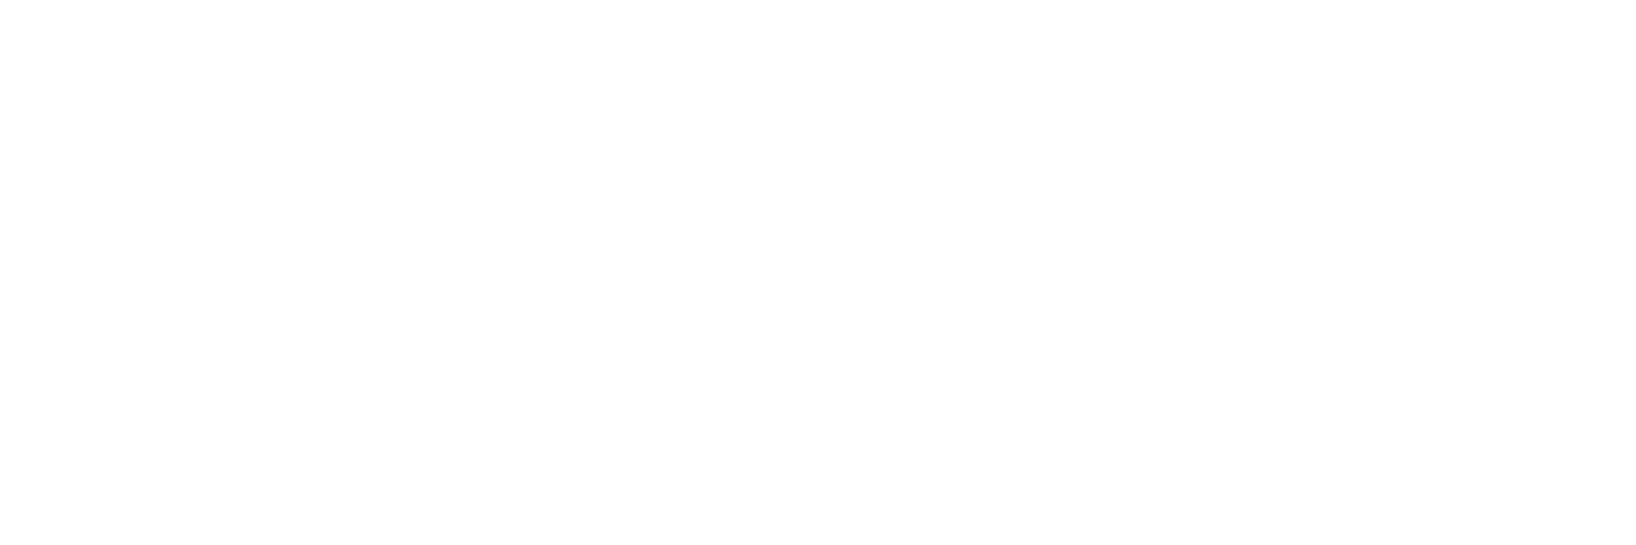

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 6: ordinal not in range(128)

In [129]:
%matplotlib notebook

numeros = list(range(0, len(aux['place_name'])))
plt.bar(numeros, aux['price_aprox_usd'])
plt.suptitle("Relación entre precio y lugar de propiedades en venta")
plt.xlabel("Lugar")
plt.ylabel("Precio")
plt.xticks(numeros, aux['place_name'])
plt.show()


In [130]:
aux = dsSell.groupby('place_name').count().reset_index().rename(columns={'price_aprox_usd':'cantidad'}).sort_values(by = 'cantidad',ascending= False)[['place_name', 'cantidad']]
aux

,place_name,cantidad
529,Tigre,12115
421,Nordelta,11696
183,Capital Federal,11499
444,Pilar,10249
156,Belgrano,9505
464,Ramos Mejía,9379
429,Palermo,8294
178,Caballito,6364
423,Olivos,6311
417,Morón,5211


<IPython.core.display.Javascript object>


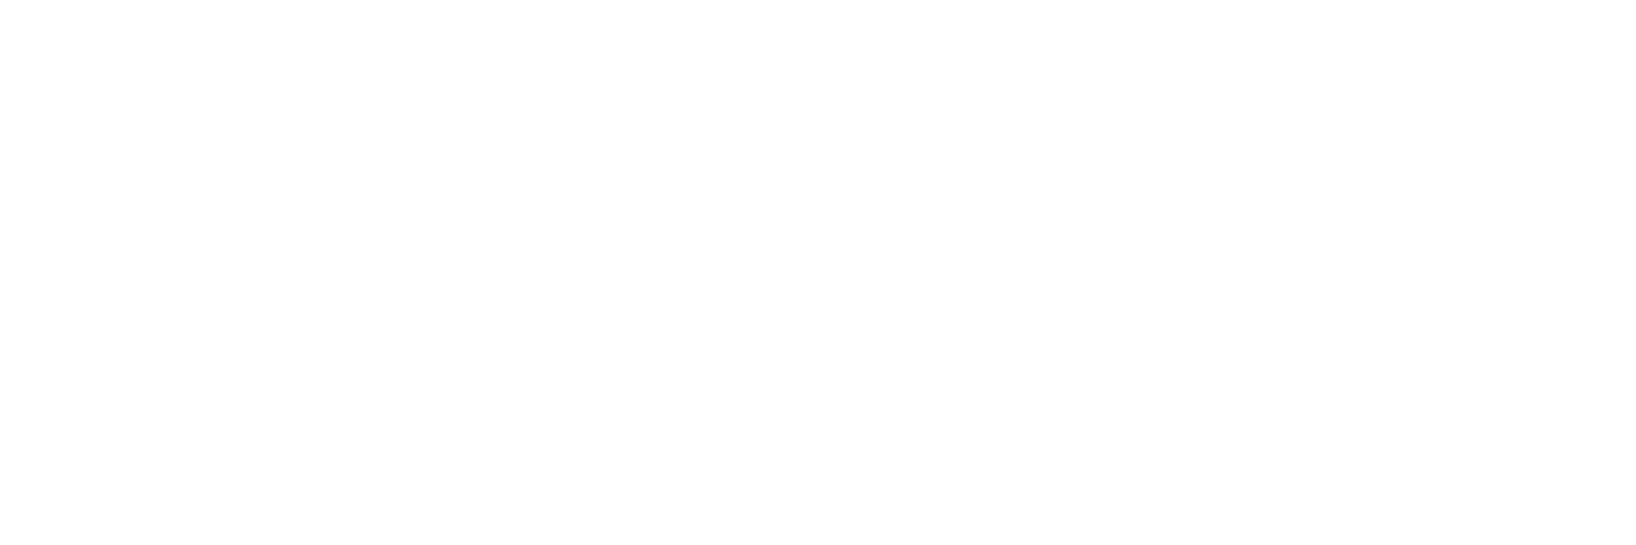

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 6: ordinal not in range(128)

In [131]:
%matplotlib notebook

numeros = list(range(0, len(aux['place_name'])))
plt.bar(numeros, aux['cantidad'])
plt.suptitle("Relación entre lugar y cantidad de publicaciones de ese lugar")
plt.xlabel("Lugar")
plt.ylabel("Cantidad")
plt.xticks(numeros, aux['place_name'])
plt.show()


In [132]:
#convertimos el formato de la fecha
dsSell['year'] =pd.to_numeric(dsSell['created_on'].map( lambda x: x.split('-')[0]))
dsSell['month'] = pd.to_numeric(dsSell['created_on'].map( lambda x: x.split('-')[1]))
dsSell['created_on'] = dsSell['created_on'] .map(lambda x: x.split('-')[0]+x.split('-')[1]+x.split('-')[2])
dsSell

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,municipio,zona,year,month
3,NaN,20120808,USD,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...,...,4.0,NaN,NaN,349.0,NaN,NaN,General San Martín,Bs.As. G.B.A. Zona Norte,2012,8
6,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/BJum1WvpYb6P...,...,NaN,NaN,NaN,153.0,NaN,NaN,General San Martín,Bs.As. G.B.A. Zona Norte,2012,8
10,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/77Q-mNgsgx7O...,...,NaN,NaN,NaN,85.0,NaN,NaN,Tigre,Bs.As. G.B.A. Zona Norte,2012,8
11,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/DuUbXCV9Xzos...,...,4.0,NaN,NaN,383.0,NaN,NaN,Pilar,Bs.As. G.B.A. Zona Norte,2012,8
12,NaN,20120808,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/UAN_2iHtE0hA...,...,NaN,NaN,NaN,255.0,NaN,NaN,Tigre,Bs.As. G.B.A. Zona Norte,2012,8
13,NaN,20120808,USD,NaN,NaN,NaN,5.0,NaN,NaN,http://cf-thumbs.properati.com.ar/pJ0Vap4MCjhW...,...,4.0,NaN,NaN,240.0,NaN,NaN,Las Cañitas,Capital Federal,2012,8
14,NaN,20120809,USD,NaN,NaN,NaN,NaN,3433918.0,NaN,http://cf-thumbs.properati.com.ar/7LLinQKdItkV...,...,5.0,NaN,NaN,250.0,NaN,NaN,Flores,Capital Federal,2012,8
16,NaN,20120815,USD,NaN,NaN,NaN,NaN,3433910.0,NaN,http://cf-thumbs.properati.com.ar/folXLAuUibJC...,...,1.0,NaN,NaN,25.0,NaN,NaN,Floresta,Capital Federal,2012,8
17,NaN,20120815,USD,NaN,NaN,NaN,NaN,NaN,NaN,http://cf-thumbs.properati.com.ar/QIshWpCxB_sU...,...,4.0,NaN,NaN,180.0,NaN,NaN,Parque Centenario,Capital Federal,2012,8
18,NaN,20120817,USD,NaN,NaN,NaN,NaN,3431333.0,NaN,http://cf-thumbs.properati.com.ar/vfIoxXFjrZY7...,...,3.0,NaN,NaN,108.0,NaN,NaN,Liniers,Capital Federal,2012,8


In [133]:
#vemos las distintas moneadas en las que se realizan las transacciones 
dsSell['currency'].value_counts()

USD    279287
ARS     21725
BRL         2
PEN         2
Name: currency, dtype: int64

In [134]:
#pasar precios a usd


#usamos un promedio aprox del dolar en estos 4 años. se peude hacer ocn mas precisión
#dsSell['priceInUsd'] = dsSell[['price', 'currency']].apply(lambda x: x[0] if x[1] == 'USD' else x[0] / 14, axis=1) 

#dsSell['priceInUsd']

In [135]:
#vemos como evolucionan algunos features en el tiempo para la venta
cantidadSellEnAnios = dsSell.groupby('created_on').count().reset_index().rename(columns={'price_aprox_usd':'cantidad'}).sort_values(by = 'created_on',ascending= True)[['created_on', 'cantidad']]
preciosSellEnAnios = dsSell.groupby('created_on').mean().reset_index().sort_values(by = 'created_on',ascending= True)[['created_on', 'price_aprox_usd']]

<IPython.core.display.Javascript object>


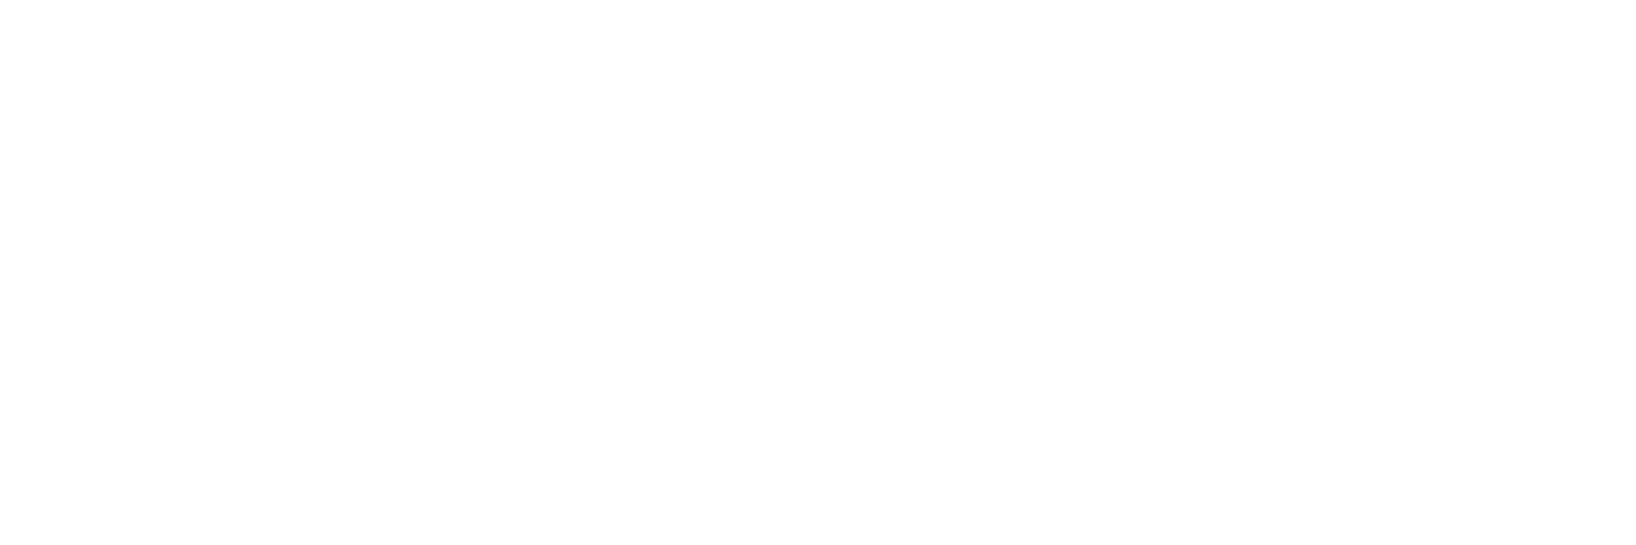

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 7: ordinal not in range(128)

In [136]:
%matplotlib notebook

numeros = list(range(0, len(cantidadSellEnAnios['created_on'])))
plt.bar(numeros, cantidadSellEnAnios['cantidad'])
plt.suptitle("Evolución de cantidad de rentas en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad Rentas")
plt.xticks(numeros, cantidadSellEnAnios['created_on'])
plt.show()



<IPython.core.display.Javascript object>


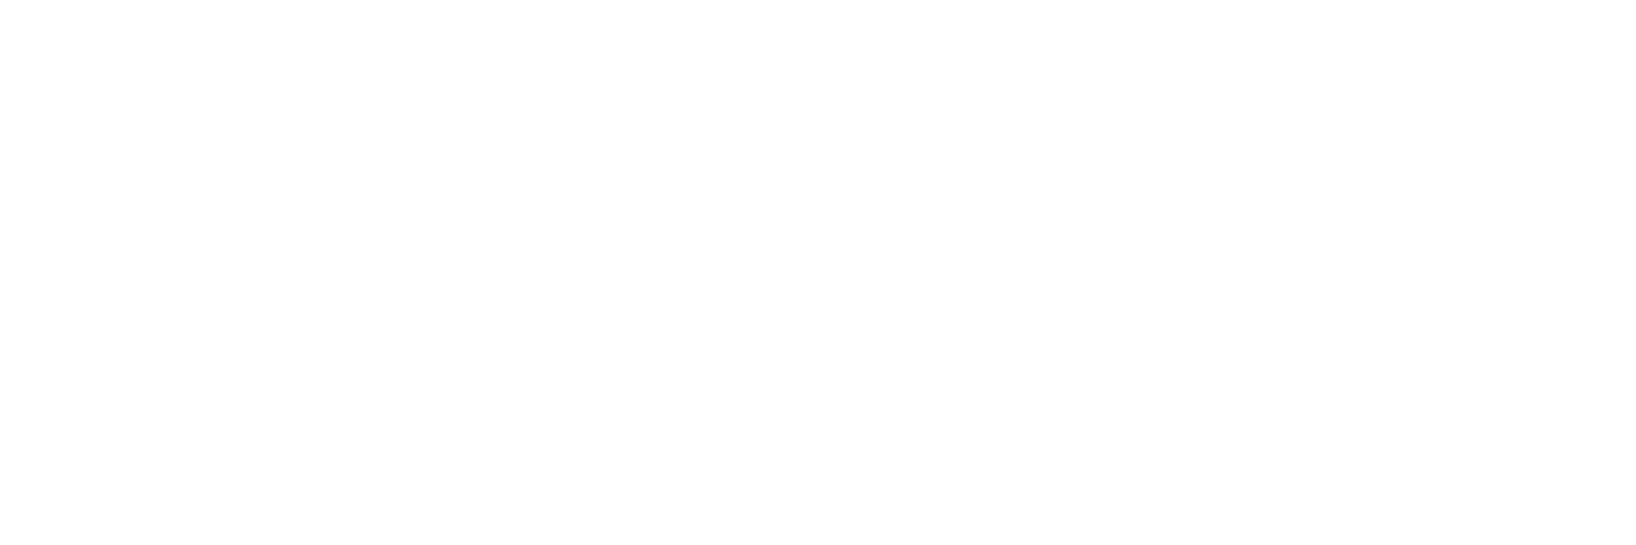

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 7: ordinal not in range(128)

In [137]:
%matplotlib notebook

numeros = list(range(0, len(preciosSellEnAnios['created_on'])))
plt.bar(numeros, preciosSellEnAnios['price_aprox_usd'])
plt.suptitle("Evolución del precio a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.xticks(numeros, preciosSellEnAnios['created_on'])
plt.show()


In [138]:
#Cantidad de viviendas vendidas en dolares y pesos a lo largo del tiempo
cantidadSellEnAniosEnDolares = dsSell[dsSell['currency'] == 'USD'].groupby('created_on').count().reset_index().rename(columns={'price':'cantidad'}).sort_values(by = 'created_on',ascending= True)[['created_on', 'cantidad']]
cantidadSellEnAniosEnPesos = dsSell[dsSell['currency'] == 'ARS'].groupby('created_on').count().reset_index().rename(columns={'price':'cantidad'}).sort_values(by = 'created_on',ascending= True)[['created_on', 'cantidad']]

<IPython.core.display.Javascript object>


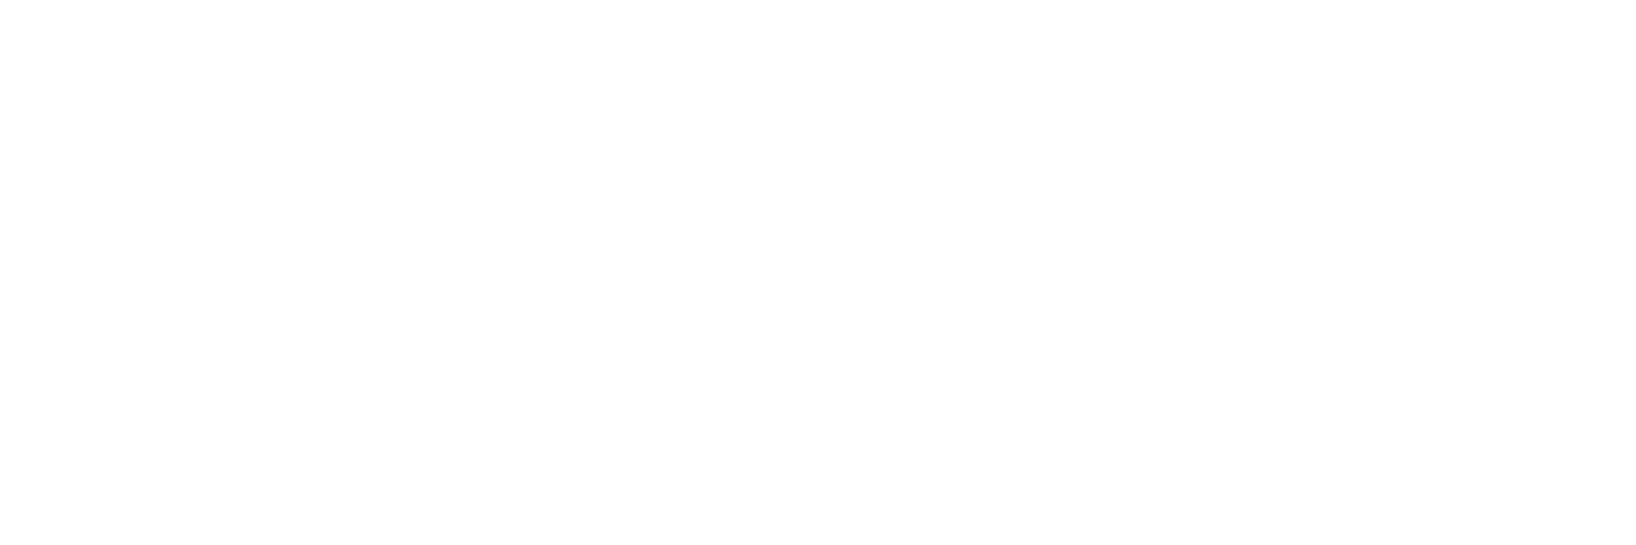

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 7: ordinal not in range(128)

In [139]:
%matplotlib notebook

numeros = list(range(0, len(cantidadSellEnAniosEnDolares['created_on'])))
plt.bar(numeros, cantidadSellEnAniosEnDolares['cantidad'])
plt.suptitle("Evolución de cantidad de rentas en el tiempo en dolares")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad Rentas")
plt.xticks(numeros, cantidadSellEnAniosEnDolares['created_on'])
plt.show()


<IPython.core.display.Javascript object>


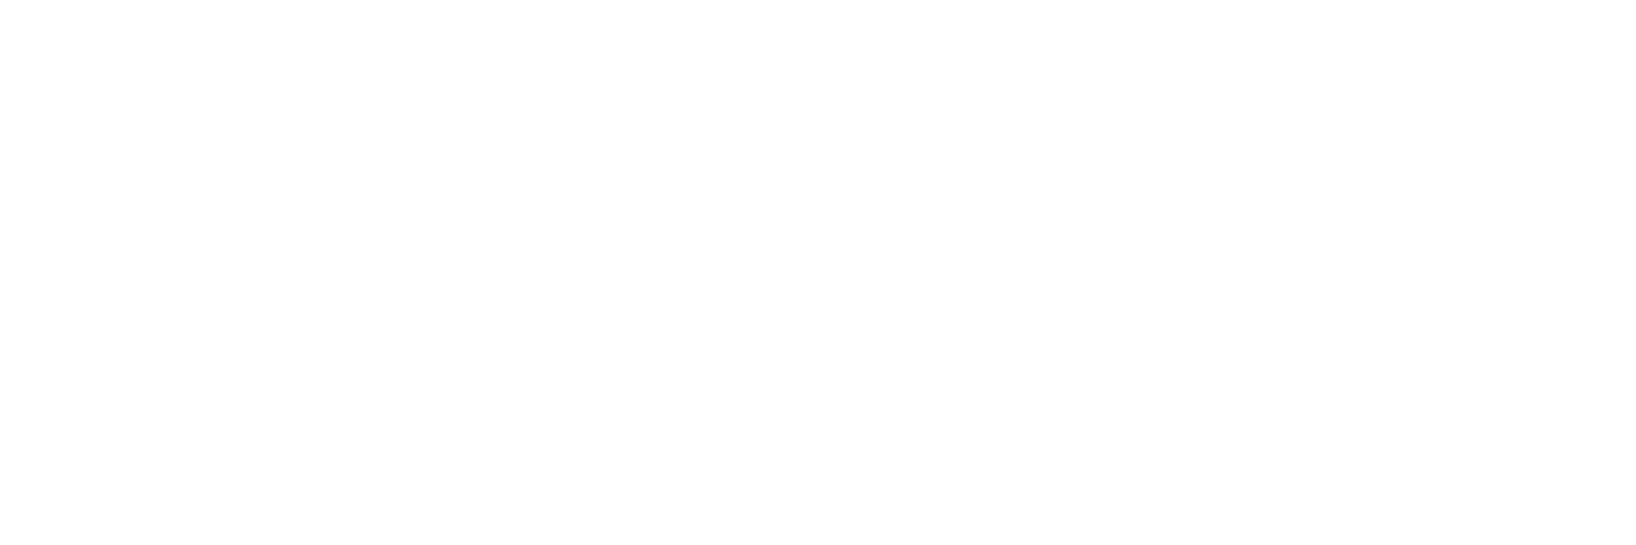

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 7: ordinal not in range(128)

In [140]:
%matplotlib notebook

numeros = list(range(0, len(cantidadSellEnAniosEnPesos['created_on'])))
plt.bar(numeros, cantidadSellEnAniosEnPesos['cantidad'])
plt.suptitle("Evolución de cantidad de rentas en el tiempo en pesos")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad Rentas")
plt.xticks(numeros, cantidadSellEnAniosEnPesos['created_on'])
plt.show()

In [ ]:
#analizamos el precio de los lugares a lo largo del tiempo

aux = dsSell.groupby(['place_name', 'created_on']).mean().reset_index().sort_values(by = 'price_aprox_usd',ascending= False)[['place_name', 'created_on','price_aprox_usd']]
aux

In [ ]:
#ESTO ESTA BASTATNE MAL 


%matplotlib notebook

plt.scatter(aux['created_on'], aux['price_aprox_usd'])
plt.suptitle("Evolución de preico en pesos en los lugares a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Precio En Pesos")
#plt.xticks(numeros, cantidadRentEnAniosEnPesos['created_on'])
plt.show()

<IPython.core.display.Javascript object>


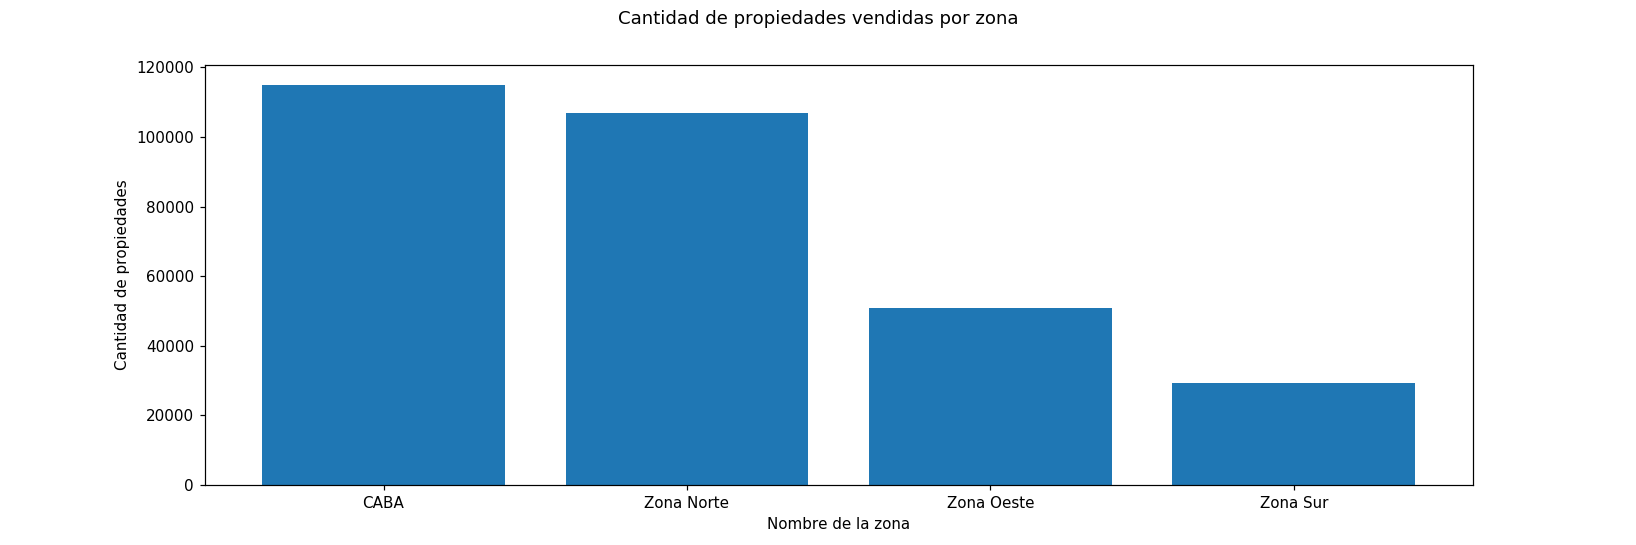

([<matplotlib.axis.XTick at 0xc646b898>,
 <a list of 4 Text xticklabel objects>)

In [141]:
#Vemos que zona tiene mas propiedades vendidas
%matplotlib notebook
nombre_zona = ['CABA', 'Zona Norte', 'Zona Oeste', 'Zona Sur']
cosa = [1, 2, 3, 4]
cant = dsSell['zona'].value_counts()
precios_zona = [cant[0], cant[1], cant[2], cant[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades vendidas por zona")
plt.xlabel("Nombre de la zona")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


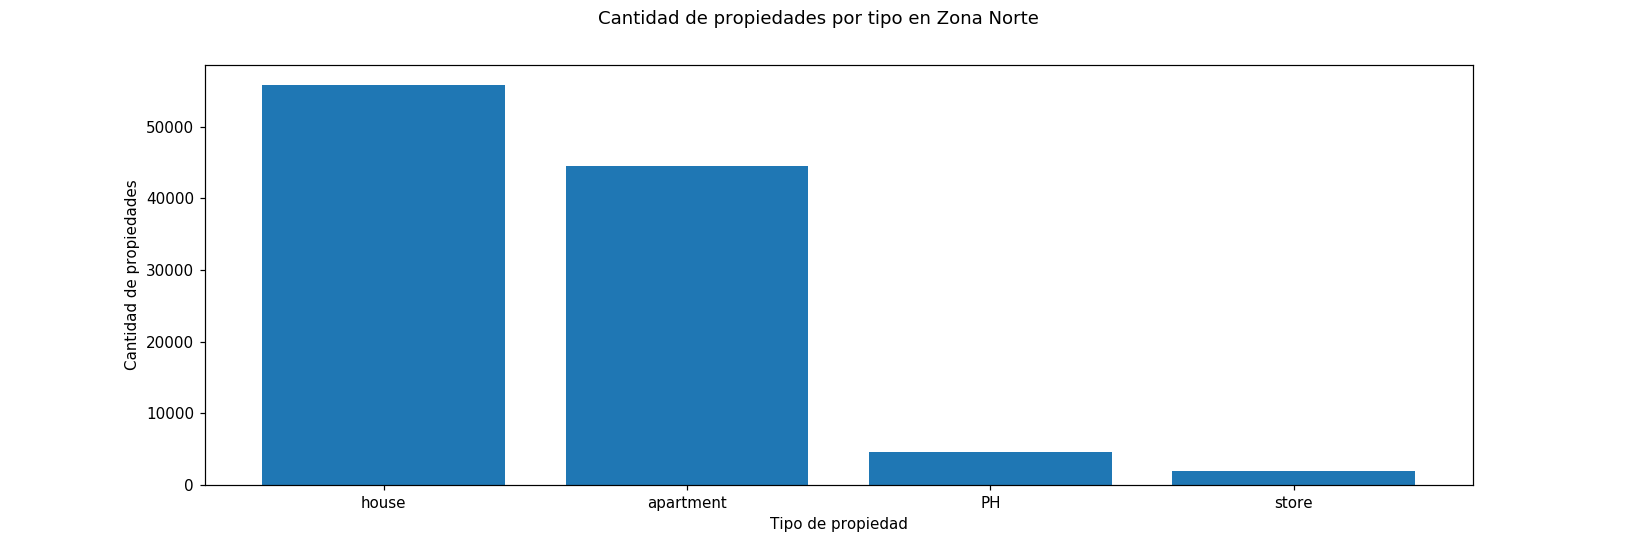

([<matplotlib.axis.XTick at 0xc65fa0f0>,
 <a list of 4 Text xticklabel objects>)

In [142]:
#Calculamos que tipo de propiedad se vende mas en Zona Norte
%matplotlib notebook
nombre_zona = ['house', 'apartment', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Bs.As. G.B.A. Zona Norte']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Zona Norte")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


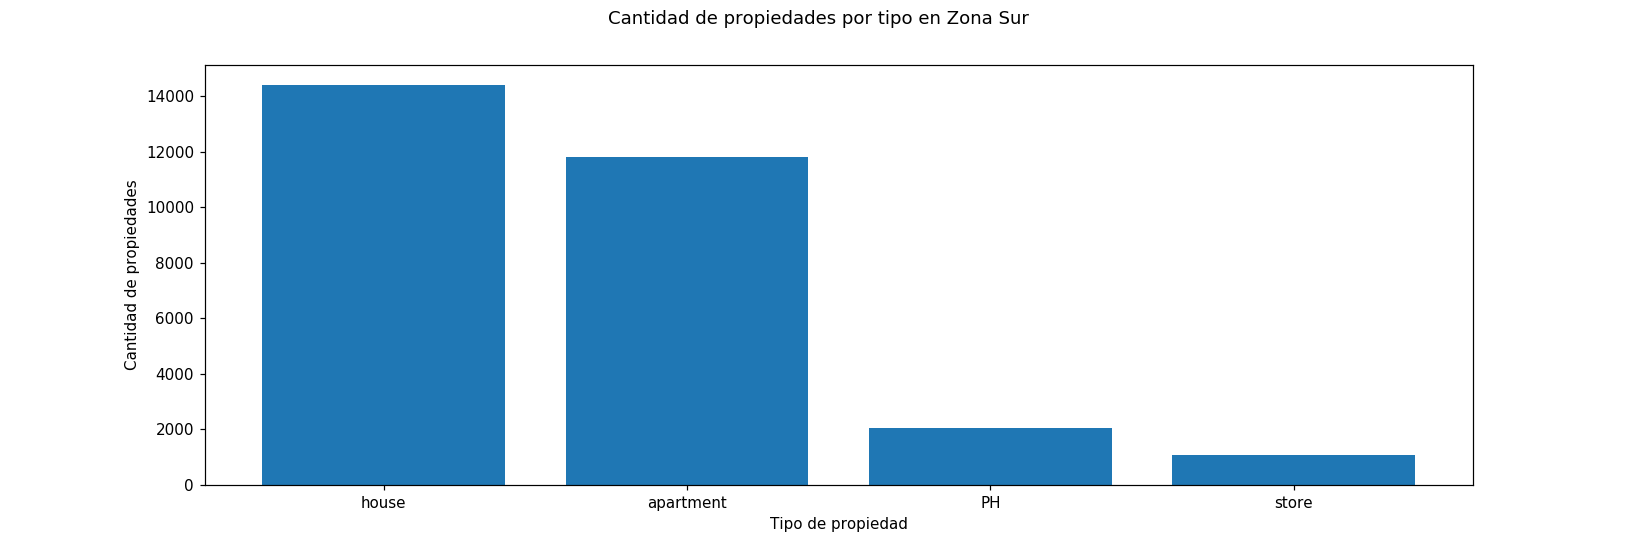

([<matplotlib.axis.XTick at 0xc65ddf60>,
 <a list of 4 Text xticklabel objects>)

In [143]:
#Calculamos que tipo de propiedad se vende mas en Zona Sur
%matplotlib notebook
nombre_zona = ['house', 'apartment', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Bs.As. G.B.A. Zona Sur']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Zona Sur")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


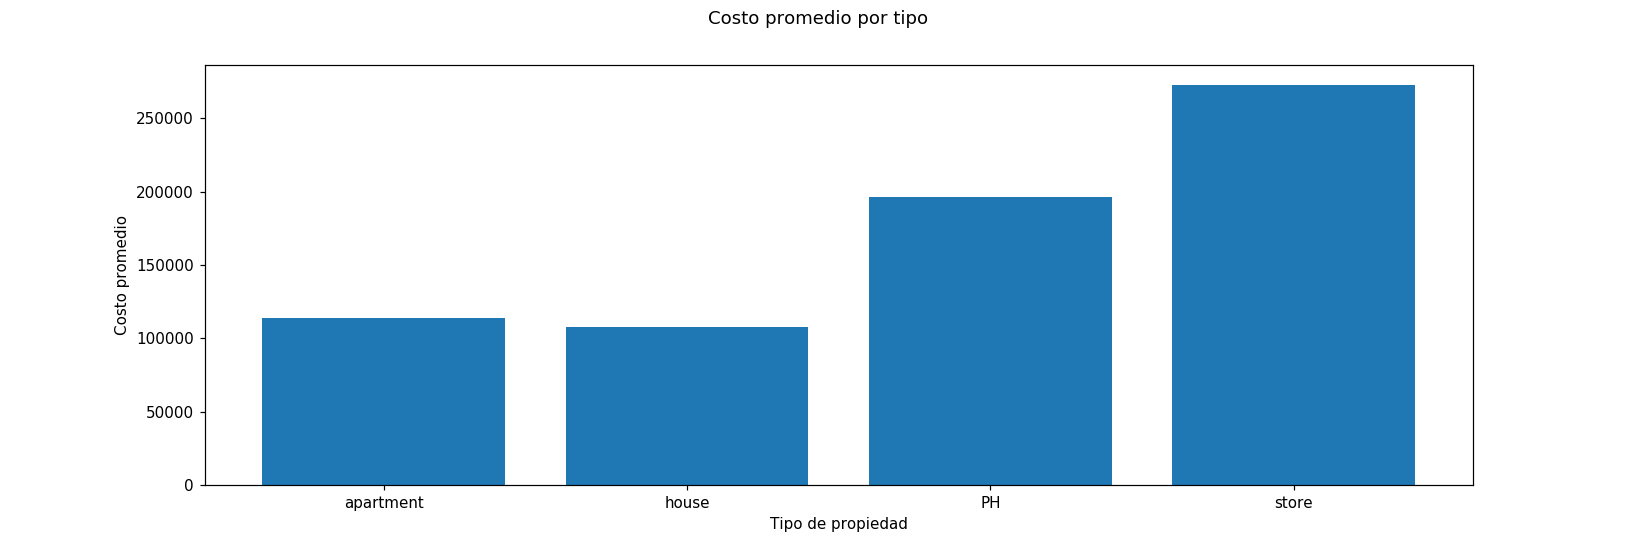

([<matplotlib.axis.XTick at 0xc6950198>,
 <a list of 4 Text xticklabel objects>)

In [144]:
#Calculamos que tipo de propiedad se vende mas en Zona Oeste
%matplotlib notebook
nombre_zona = ['apartment', 'house', 'PH', 'store']
cosa = [1, 2, 3, 4]
aux = dsSell[dsSell.zona == 'Bs.As. G.B.A. Zona Oeste']
typ = aux.groupby('property_type').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Costo promedio por tipo")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Costo promedio")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


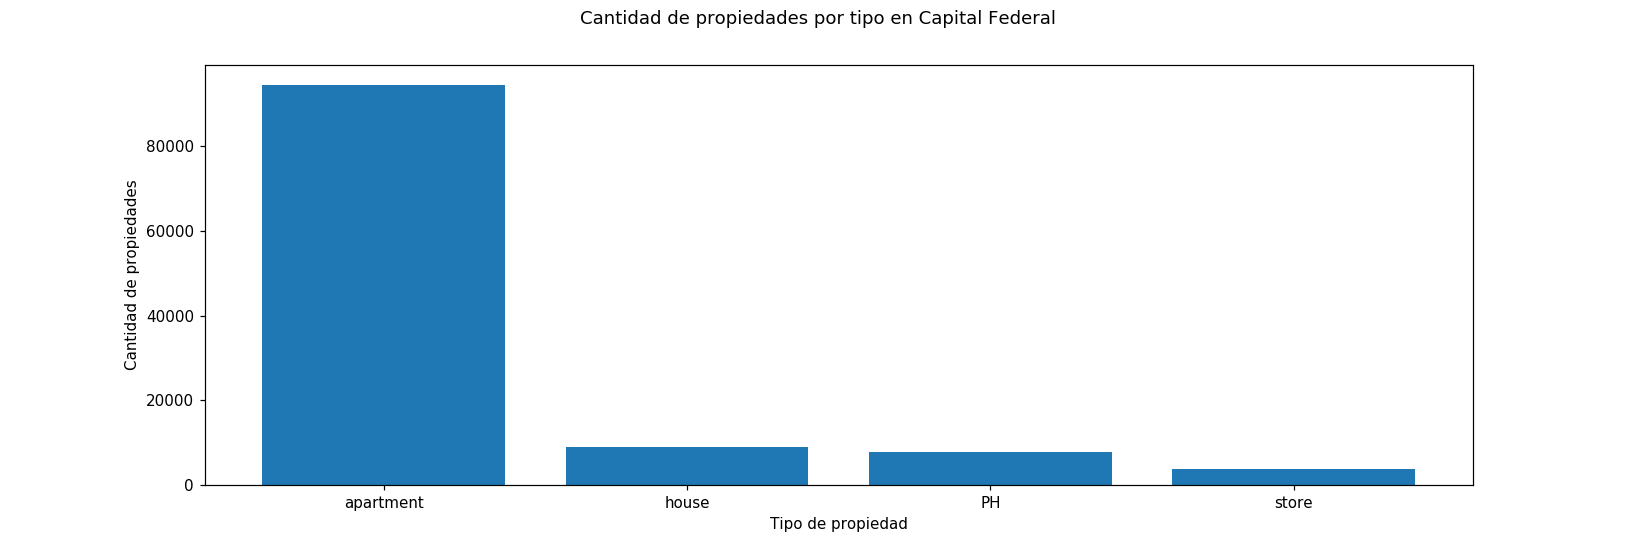

([<matplotlib.axis.XTick at 0xc6bec048>,
 <a list of 4 Text xticklabel objects>)

In [145]:


#Calculamos que tipo de propiedad se vende mas en Capital Federal
%matplotlib notebook
nombre_zona = ['apartment', 'house', 'PH', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell[dsSell.zona == 'Capital Federal']['property_type'].value_counts()
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Capital Federal")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


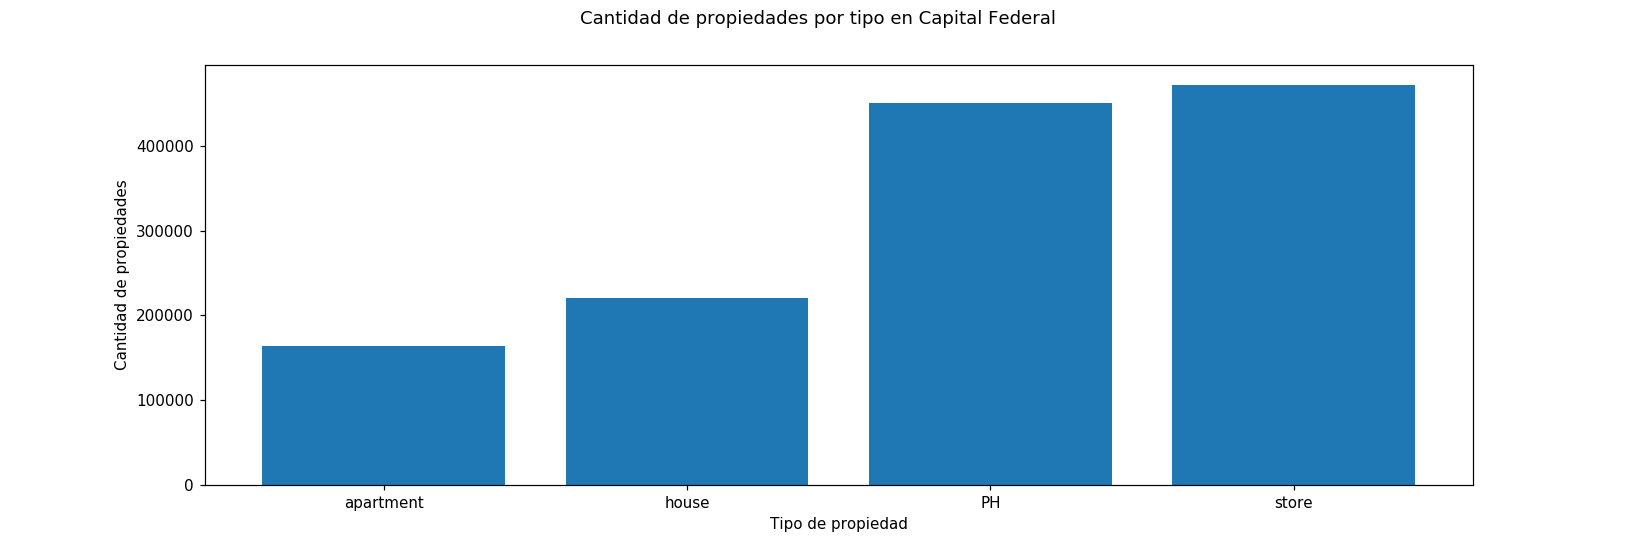

([<matplotlib.axis.XTick at 0xc6aed400>,
 <a list of 4 Text xticklabel objects>)

In [150]:
#Calculamos cuanto sale cada tipo en promedio en Capital Federal
%matplotlib notebook
nombre_zona = ['apartment', 'house', 'PH', 'store']
cosa = [1, 2, 3, 4]
capi = dsSell[dsSell.zona == 'Capital Federal']
typ = capi.groupby('property_type').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Cantidad de propiedades por tipo en Capital Federal")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad de propiedades")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


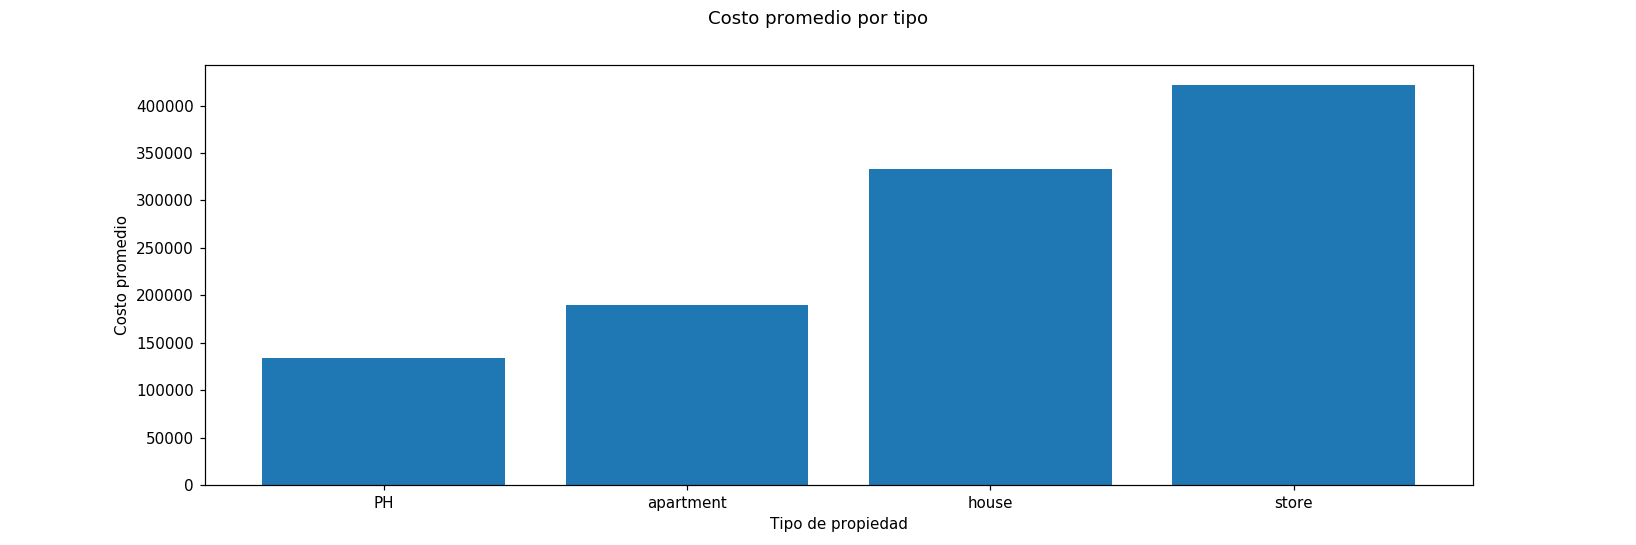

([<matplotlib.axis.XTick at 0xc68aa588>,
 <a list of 4 Text xticklabel objects>)

In [151]:
#Calculamos cuanto sale cada tipo en promedio 
%matplotlib notebook
nombre_zona = ['PH', 'apartment', 'house', 'store']
cosa = [1, 2, 3, 4]
typ = dsSell.groupby('property_type').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Costo promedio por tipo")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Costo promedio")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


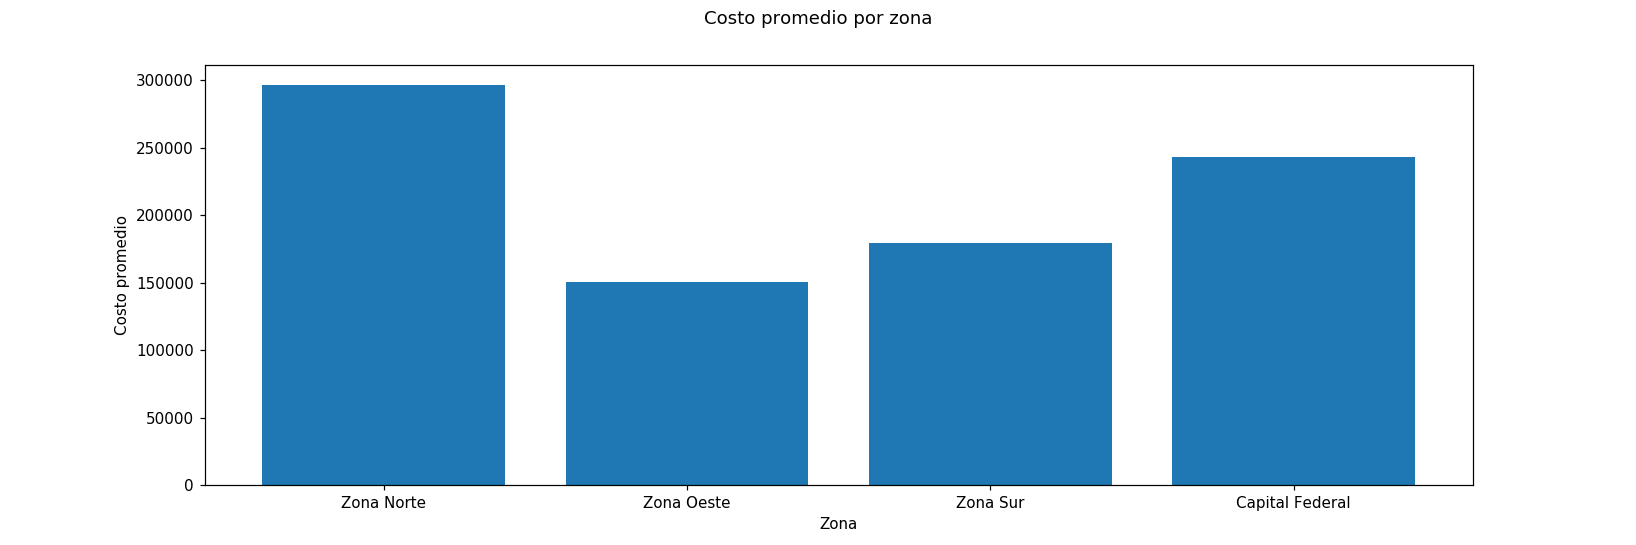

([<matplotlib.axis.XTick at 0xeaf7a358>,
 <a list of 4 Text xticklabel objects>)

In [152]:
#Vemos que zona es mas cara en promedio
%matplotlib notebook
nombre_zona = ['Zona Norte', 'Zona Oeste', 'Zona Sur', 'Capital Federal']
cosa = [1, 2, 3, 4]
typ = dsSell.groupby('zona').mean()['price_aprox_usd']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Costo promedio por zona")
plt.xlabel("Zona")
plt.ylabel("Costo promedio")
plt.xticks(cosa, nombre_zona)

<IPython.core.display.Javascript object>


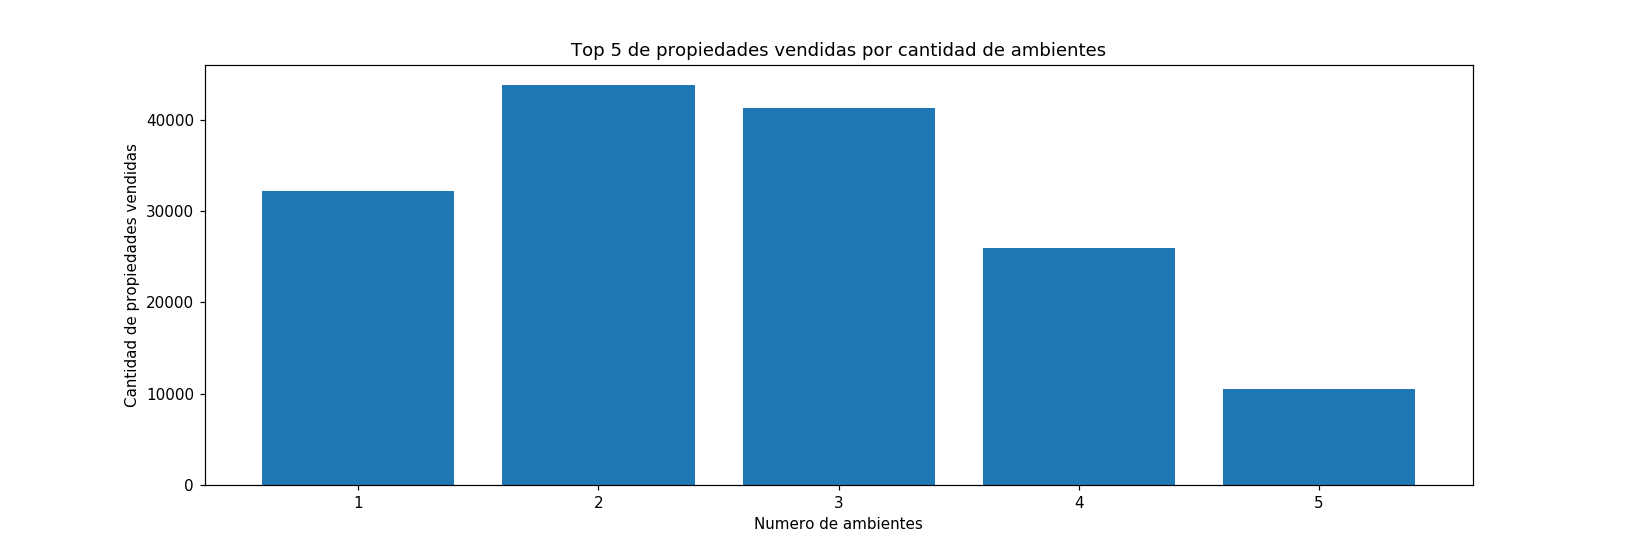

In [153]:
#Que cantidad de ambientes se vende mas?
%matplotlib notebook
cosa = [2, 3, 1, 4, 5]
typ = dsSell['rooms'].value_counts()
precios_piso = [typ[2], typ[3], typ[1], typ[4], typ[5]]
plt.bar(cosa, precios_piso)
plt.title('Top 5 de propiedades vendidas por cantidad de ambientes')
plt.xlabel('Numero de ambientes')
plt.ylabel('Cantidad de propiedades vendidas')

<IPython.core.display.Javascript object>


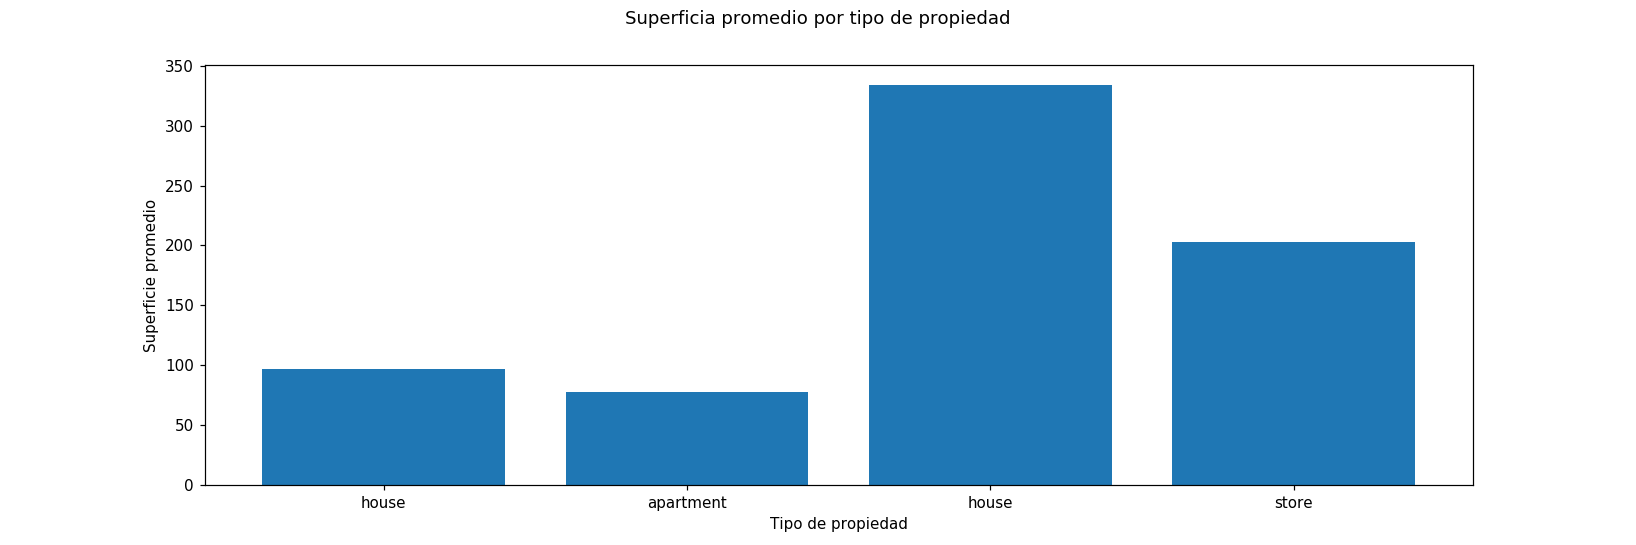

([<matplotlib.axis.XTick at 0xeb1c65c0>,
 <a list of 4 Text xticklabel objects>)

In [154]:
#Caculamos la superficie promedio de cada tipo de propiedad
%matplotlib notebook
cosa = [1, 2, 3, 4]
nombre_tipo=['house', 'apartment', 'house', 'store']
typ = dsSell.groupby('property_type').mean()['surface_in_m2']
precios_zona = [typ[0], typ[1], typ[2], typ[3]]
plt.bar(cosa, precios_zona)
plt.suptitle("Superficia promedio por tipo de propiedad")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Superficie promedio")
plt.xticks(cosa, nombre_tipo)

In [ ]:
dsSell.groupby('zona').mean()['price_usd_per_m2']

In [155]:
Sell2012 = dsSell[dsSell.created_on.str.contains('2012')]
Sell2013 = dsSell[dsSell.created_on.str.contains('2013')]
Sell2014 = dsSell[dsSell.created_on.str.contains('2014')]
Sell2015 = dsSell[dsSell.created_on.str.contains('2015')]
Sell2016 = dsSell[dsSell.created_on.str.contains('2016')]
Sell2017 = dsSell[dsSell.created_on.str.contains('2017')]
print (Sell2012.id.count())
print (Sell2013.id.count())
print (Sell2014.id.count())
print (Sell2015.id.count())
print (Sell2016.id.count())
print (Sell2017.id.count())

3
357
3599
8315
59443
76030


In [156]:
dSell2012 = Sell2012.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2013 = Sell2013.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2014 = Sell2014.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2015 = Sell2015.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2016 = Sell2016.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell2017 = Sell2017.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell_price_m2_per_year = Sell2012.groupby('zona').mean().reset_index()[['zona','price_usd_per_m2']]
dSell_price_m2_per_year['price_usd_per_m2-2013'] = dSell2013['price_usd_per_m2']
dSell_price_m2_per_year['price_usd_per_m2-2014'] = dSell2014['price_usd_per_m2']
dSell_price_m2_per_year['price_usd_per_m2-2015'] = dSell2015['price_usd_per_m2']
dSell_price_m2_per_year['price_usd_per_m2-2016'] = dSell2016['price_usd_per_m2']
dSell_price_m2_per_year['price_usd_per_m2-2017'] = dSell2017['price_usd_per_m2']
dSell_price_m2_per_year.rename(columns={'price_usd_per_m2':'price_usd_per_m2-2012'},inplace = True)
dSell_price_m2_per_year.head()

,zona,price_usd_per_m2-2012,price_usd_per_m2-2013,price_usd_per_m2-2014,price_usd_per_m2-2015,price_usd_per_m2-2016,price_usd_per_m2-2017
0,Bs.As. G.B.A. Zona Norte,1381.806414,1851.048579,1211.650669,1403.292299,1634.885487,1847.432807
1,Bs.As. G.B.A. Zona Oeste,805.626271,1463.920457,1185.779292,1282.050329,1431.704285,1295.971166
2,Bs.As. G.B.A. Zona Sur,1206.732371,1500.689534,1191.057100,1233.497276,1343.147175,1512.130051
3,Capital Federal,2115.121019,2509.180265,2193.455416,2457.443527,2587.740926,3091.645588


In [157]:
per_m2 = dsSell.loc[:,['zona','price_usd_per_m2','created_on','property_type', 'year', 'month']]
per_m2['created_on'] = pd.to_numeric(per_m2['created_on'])
per_m2.head()

,zona,price_usd_per_m2,created_on,property_type,year,month
3,Bs.As. G.B.A. Zona Norte,315.186246,20120808,house,2012,8
6,Bs.As. G.B.A. Zona Norte,647.058824,20120808,house,2012,8
10,Bs.As. G.B.A. Zona Norte,1294.117647,20120808,apartment,2012,8
11,Bs.As. G.B.A. Zona Norte,1697.127937,20120808,house,2012,8
12,Bs.As. G.B.A. Zona Norte,1176.470588,20120808,house,2012,8


In [158]:
per_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301820 entries, 3 to 187480
Data columns (total 6 columns):
zona                301820 non-null object
price_usd_per_m2    210223 non-null float64
created_on          301820 non-null int64
property_type       301820 non-null object
year                301820 non-null int64
month               301820 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 16.1+ MB


In [159]:
indice = per_m2['zona'].value_counts().reset_index()['index']

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 73: ordinal not in range(128)

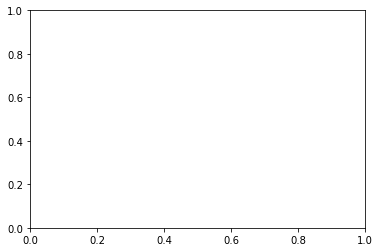

In [160]:
%matplotlib inline

plt.figure()
plt.title('Evolucion del precio promedio del m2 en USD de las propiedades entre el año 2012 - 2017')

for i in indice:
    per_m2.loc[per_m2.zona.str.contains(i),['price_usd_per_m2','year']].groupby('year').mean().loc[:,'price_usd_per_m2'].plot(linewidth=2,figsize=(6,6),label=i);
plt.ylabel('precio promedio del m2 en USD')
plt.xlabel('year')
plt.legend()
plt.show()

In [ ]:
marker_size=5
plt.scatter(per_m2['created_on'], per_m2['price_usd_per_m2'],s = 50,alpha=0.25,zorder=50)
plt.suptitle("Evolución de precio del m2 en USD en los lugares a lo largo del tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Precio m2en USD")
plt.xlim([min(per_m2['created_on'])- 1000 , max(per_m2['created_on'])+1000])
plt.ylim([min(per_m2['price_usd_per_m2']), max(per_m2['price_usd_per_m2'] )- 1200000])
plt.show()

In [ ]:
%matplotlib inline

plt.figure()
plt.title('Evolucion del precio promedio del m2 en USD de las propiedades por meses')
for i in indice:
    
    per_m2.groupby('zona').get_group(i).loc[:,['zona','price_usd_per_m2','month']].groupby('month').mean().loc[:,'price_usd_per_m2'].plot(figsize=(10,10),label=i);
plt.ylabel('precio promedio del m2 en USD')
plt.xlabel('month')
plt.legend()
plt.show()

In [ ]:
indiceType = per_m2['property_type'].value_counts().reset_index()['index']
indiceType

In [ ]:
%matplotlib inline


for a in indice:
    plt.figure()
    
    for i in indiceType:
        plt.title('Evolucion del precio promedio del m2 en USD de las propiedades en la zona de '+a)
        per_m2.groupby('zona').get_group(a).groupby('property_type').get_group(i).loc[:,['zona','price_usd_per_m2','year']].groupby('year').mean().loc[:,'price_usd_per_m2'].plot(figsize=(10,10),label=i);
    plt.ylabel('precio promedio del m2 en USD')
    plt.xlabel('year')
    plt.legend()
    plt.show()

In [ ]:
dsSell.groupby('expenses').mean()

In [ ]:
cantidadEnVentaPorMes = dsSell.groupby(['month', 'year']).count().reset_index().rename(columns={'priceInUsd':'cantidad'})[['year', 'month', 'cantidad']]
precioEnEventaPorMes = dsSell.groupby(['month', 'year']).mean().reset_index()[['year', 'month', 'priceInUsd']]

In [ ]:
anios = dsSell['year'].value_counts().reset_index()['index']
anios

In [ ]:
%matplotlib inline

plt.figure()
plt.title('Cantidad de viviendas en venta en meses para cada año')
for i in anios:
    
    cantidadEnVentaPorMes.groupby('year').get_group(i).groupby('month').mean().loc[:,'cantidad'].plot(figsize=(10,10),label=i);
plt.ylabel('Cantdad en venta')
plt.xlabel('Mes')
plt.legend()
plt.show()

In [ ]:
%matplotlib inline

plt.figure()
plt.title('Precio de viviendas en venta en meses para cada año')
for i in anios:
    
    precioEnEventaPorMes.groupby('year').get_group(i).groupby('month').mean().loc[:,'priceInUsd'].plot(figsize=(10,10),label=i);
plt.ylabel('Precio de venta')
plt.xlabel('Mes')
plt.legend()
plt.show()

In [ ]:
#sobre esto tal vez se puede hacer analisis de texto. tambien analizar la imagen..
dsSell[['description', 'image_thumbnail']]

In [ ]:
#drop de columnas

dsSell.drop('currency', axis=1, inplace=True)
dsSell.drop('extra', axis=1, inplace=True)
dsSell.drop('id', axis=1, inplace=True)
dsSell.drop('image_thumbnail', axis=1, inplace=True)
dsSell.drop('properati_url', axis=1, inplace=True)
dsSell.drop('title', axis=1, inplace=True)
dsSell.drop('lat-lon', axis=1, inplace=True)
dsSell.drop('operation', axis=1, inplace=True)
dsSell.drop('price_aprox_usd', axis=1, inplace=True)
dsSell.drop('price', axis=1, inplace=True)
dsSell.drop('price_aprox_local_currency', axis=1, inplace=True)
dsSell.drop('country_name', axis=1, inplace=True)

In [ ]:
#one hot encoding de los place name. me suena mal muchas columnas. performance

one_hot = pd.get_dummies(dsSell['place_name'])
dsSell.drop('place_name', axis=1, inplace=True)
dsSell = dsSell.join(one_hot)

In [148]:
dsSell.columns

Index([u'country_name', u'created_on', u'currency', u'description',
       u'expenses', u'extra', u'floor', u'geonames_id', u'id',
       u'image_thumbnail', u'lat', u'lat-lon', u'lon', u'operation',
       u'place_name', u'place_with_parent_names', u'price',
       u'price_aprox_local_currency', u'price_aprox_usd', u'price_per_m2',
       u'price_usd_per_m2', u'properati_url', u'property_type', u'rooms',
       u'state_name', u'surface_covered_in_m2', u'surface_in_m2',
       u'surface_total_in_m2', u'title', u'municipio', u'zona', u'year',
       u'month'],
      dtype='object')